In [118]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Below function was is used in "Task 1" to create dfJourneysSanFranciscoDerived.csv**
**dfJourneysSanFranciscoDerived.csv is merged data from journeys and utilization for San Francisco location**

def get_car_availablity(row):
    df = dfUtilizationSanFrancisco.loc[(dfUtilizationSanFrancisco.carId == row['carId']) \
                 & (dfUtilizationSanFrancisco.hourlyTimestamp >= row['localTripStartTime']) \
                 & (dfUtilizationSanFrancisco.hourlyTimestamp <= row['localTripEndTime'])]
    return df.aggregate({"availableTimeInMinutes":['sum']}).iloc[0] / 60

def get_car_utilization(row):
    df = dfUtilizationSanFrancisco.loc[(dfUtilizationSanFrancisco.carId == row['carId']) \
                 & (dfUtilizationSanFrancisco.hourlyTimestamp >= row['localTripStartTime']) \
                 & (dfUtilizationSanFrancisco.hourlyTimestamp <= row['localTripEndTime'])]
    return df.aggregate({"utilizationTimeInMinutes":['sum']}).iloc[0] / 60

dfJourneysSanFrancisco['utilizationInHour'] = dfJourneysSanFrancisco.apply(lambda x: get_car_utilization(x), axis=1)
dfJourneysSanFrancisco['availabilityInHour'] = dfJourneysSanFrancisco.apply(lambda x: get_car_availablity(x), axis=1)

dfJourneysSanFrancisco.to_csv (r'dfJourneysSanFranciscoDerived.csv', index = False, header=True)

In [119]:
# read dfJourneysSanFranciscoDerived & storre into dfJourneysSanFrancisco df
dfJourneysSanFrancisco = pd.read_csv('dfJourneysSanFranciscoDerived.csv')
dfJourneysSanFrancisco

,tripId,carId,carParkingZipCode,carParkingCity,localTripStartTime,localTripEndTime,localTripCreationTime,priceInDollar,TripStartHour,TripStartDay,TripStartMonth,TripStartWeekDay,tripDurationInHour,preBookingDurationInHour,utilizationInHour,availabilityInHour
0,00010247034d28272cf5e1e16b43f52f,9ddac6a5fb0b3962db3b2f42fd31d3f9,94110,San Francisco,2017-11-14 22:15:00,2017-11-15 02:15:00,2017-11-14 20:32:59,20.00,22,14,11,1,4,1,3.75,4.0
1,0001556e5d28e66b3318e89c094186c4,0f386ec90e0710ca143922520eaf8a3e,94117,San Francisco,2017-12-07 17:00:00,2017-12-08 04:00:00,2017-12-07 04:51:42,55.00,17,7,12,3,11,12,11.50,12.0
2,000286e8771651e6983555c62558b57f,63e4509c686d891f5364c24339369460,94115,San Francisco,2017-03-23 10:00:00,2017-03-23 12:00:00,2017-03-23 08:49:48,18.00,10,23,3,3,2,1,2.50,3.0
3,0003651ffd2f07a7226fd6b7c979fecb,c9fbe5bf8e406cd13bd33ff5411fa3e3,94103,San Francisco,2017-07-05 19:00:00,2017-07-06 01:45:00,2017-07-05 01:07:31,33.75,19,5,7,2,6,17,7.00,7.0
4,00046a5e37fee728d9b1c0840741f944,812d1f2214d3fe7f9624f03b1a78cb61,94123,San Francisco,2017-12-14 13:15:00,2017-12-14 14:45:00,2017-12-14 13:08:08,14.11,13,14,12,3,1,0,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36149,fff0fc15ad79ab5e93714bafa5a6dc20,26b26593b7a0f7a80b0a7a0747882a6d,94110,San Francisco,2017-02-25 14:00:00,2017-02-25 16:00:00,2017-02-25 13:41:53,17.50,14,25,2,5,2,0,2.50,3.0
36150,fff8ae03853b573d81782ba277413dee,5fa4b685ba407cae4ea84b6a0fa80a0e,94103,San Francisco,2017-05-18 13:15:00,2017-05-18 22:30:00,2017-05-17 21:51:14,46.25,13,18,5,3,9,15,9.00,9.0
36151,fffb60627f2c2e408fef7d739543deee,d0b26f3508b4bb46f1f1b42708545df0,94108,San Francisco,2017-10-23 08:30:00,2017-10-23 18:30:00,2017-10-19 15:46:46,55.19,8,23,10,0,10,88,10.00,10.0
36152,fffd3b9e130841ba884e4fa880e44594,c687b40673df4c0fe842261a6d58b194,94114,San Francisco,2017-02-19 18:30:00,2017-02-19 19:45:00,2017-02-19 18:10:59,10.62,18,19,2,6,1,0,1.00,1.0


In [120]:
dfJourneysSanFrancisco.describe()

,carParkingZipCode,priceInDollar,TripStartHour,TripStartDay,TripStartMonth,TripStartWeekDay,tripDurationInHour,preBookingDurationInHour,utilizationInHour,availabilityInHour
count,36154.000000,36154.000000,36154.000000,36154.000000,36154.000000,36154.000000,36154.000000,36154.000000,36154.000000,36154.000000
mean,94113.237650,51.757989,12.514604,15.954804,8.136168,3.298529,8.638021,14.763816,8.954121,9.174816
std,8.712961,56.346224,4.757060,8.791377,3.121537,1.973695,12.662178,38.818126,12.269945,12.322676
min,94102.000000,3.030000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,94105.000000,24.750000,9.000000,8.000000,6.000000,2.000000,3.000000,0.000000,3.500000,4.000000
50%,94112.000000,39.190000,12.000000,16.000000,9.000000,4.000000,6.000000,2.000000,6.000000,6.000000
75%,94118.000000,62.070000,16.000000,24.000000,11.000000,5.000000,9.000000,15.000000,9.500000,10.000000
max,94133.000000,2590.000000,23.000000,31.000000,12.000000,6.000000,518.000000,670.000000,463.000000,463.000000


In [121]:
Q1 = np.percentile(dfJourneysSanFrancisco['priceInDollar'], 25, interpolation = 'midpoint')
Q2 = np.percentile(dfJourneysSanFrancisco['priceInDollar'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(dfJourneysSanFrancisco['priceInDollar'], 75, interpolation = 'midpoint')
print(Q1, Q2, Q3)

IQR = Q3 - Q1
print('Interquartile range is', IQR)

lowerLimit = Q1 - 1.5 * IQR
print('Lower limit is', lowerLimit)

upperLimit = Q3 + 1.5 * IQR
print('Upper limit is', upperLimit)

#outlier =[]
#for x in dfJourneysSanFrancisco['priceInDollar']:
#    if ((x> upperLimit) or (x<lowerLimit)):
#         outlier.append(x)
#print(' outlier in the dataset is', outlier)
#len(outlier)

# dropping outliers records
dfJourneysSanFrancisco.drop(dfJourneysSanFrancisco[(dfJourneysSanFrancisco['priceInDollar'] > upperLimit) | (dfJourneysSanFrancisco['priceInDollar'] < lowerLimit)].index, inplace = True)


24.75 39.19 62.07
Interquartile range is 37.32
Lower limit is -31.230000000000004
Upper limit is 118.05000000000001


**Visualizations**

<AxesSubplot:ylabel='priceInDollar'>

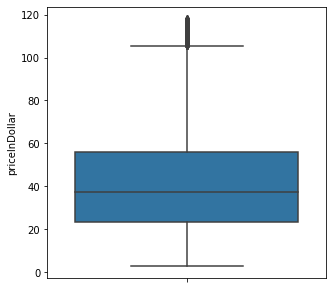

In [122]:
plt.figure(figsize=(5,5))
sns.boxplot(y=dfJourneysSanFrancisco["priceInDollar"])

<AxesSubplot:ylabel='tripDurationInHour'>

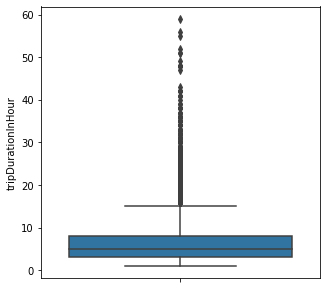

In [123]:
plt.figure(figsize=(5,5))
sns.boxplot(y=dfJourneysSanFrancisco["tripDurationInHour"])
# 2.5 days of journey is logically acceptable

<AxesSubplot:ylabel='preBookingDurationInHour'>

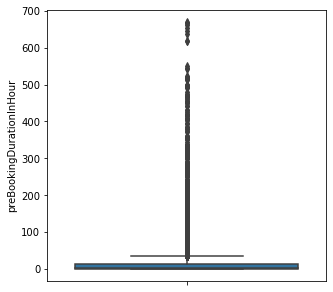

In [124]:
plt.figure(figsize=(5,5))
sns.boxplot(y=dfJourneysSanFrancisco["preBookingDurationInHour"])
# 1 month prior book is logically acceptable

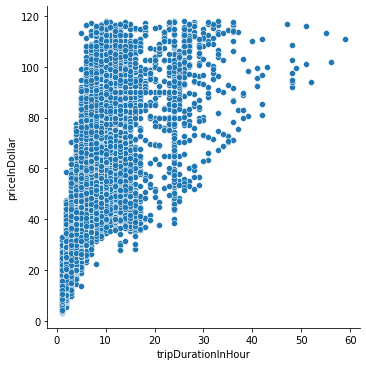

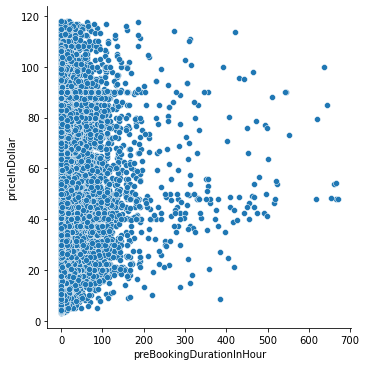

In [125]:
sns.relplot(x='tripDurationInHour', y='priceInDollar', data=dfJourneysSanFrancisco)
sns.relplot(x='preBookingDurationInHour', y='priceInDollar', data=dfJourneysSanFrancisco)

In [133]:
#plt.figure(figsize=(12,8))
#sns.barplot(x="priceInDollar", y="city", data=dfJourneysSanFrancisco)
#dfJourneysSanFrancisco

<AxesSubplot:xlabel='TripStartMonth', ylabel='priceInDollar'>

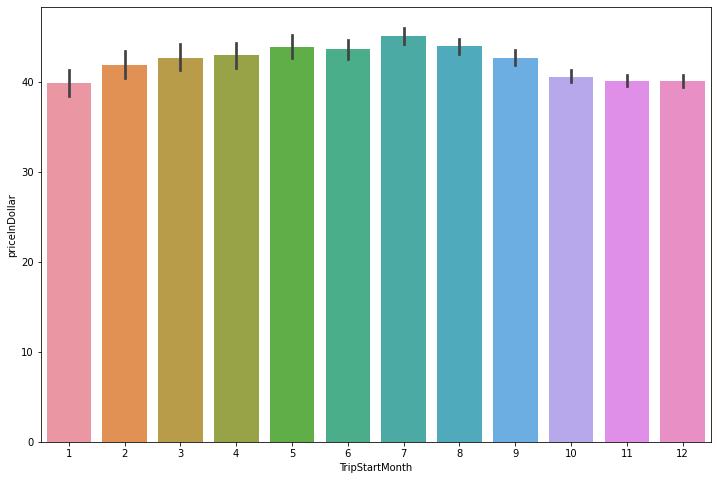

In [127]:
plt.figure(figsize=(12,8))
sns.barplot(x="TripStartMonth", y="priceInDollar", data=dfJourneysSanFrancisco)

<AxesSubplot:xlabel='TripStartWeekDay', ylabel='priceInDollar'>

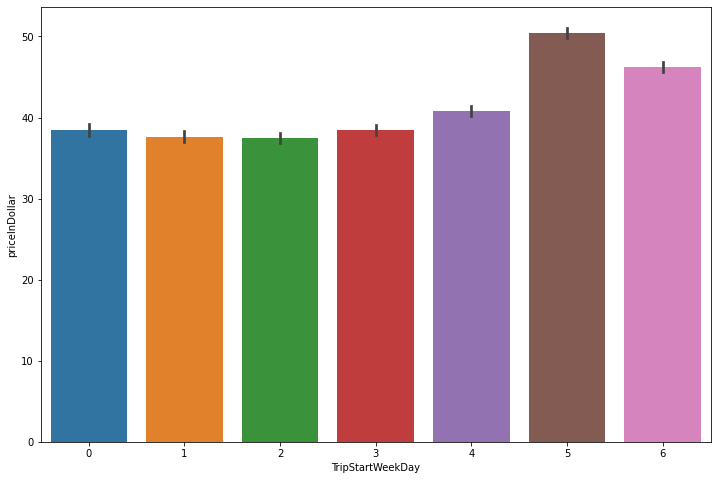

In [129]:
#Monday=0, Sunday=6
plt.figure(figsize=(12,8))
sns.barplot(x="TripStartWeekDay", y="priceInDollar", data=dfJourneysSanFrancisco)

<AxesSubplot:xlabel='TripStartHour', ylabel='priceInDollar'>

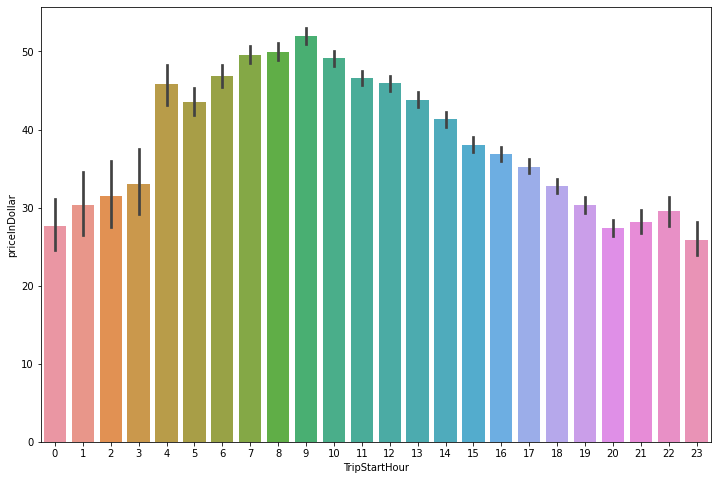

In [131]:
plt.figure(figsize=(12,8))
sns.barplot(x="TripStartHour", y="priceInDollar", data=dfJourneysSanFrancisco)

<AxesSubplot:xlabel='TripStartHour', ylabel='count'>

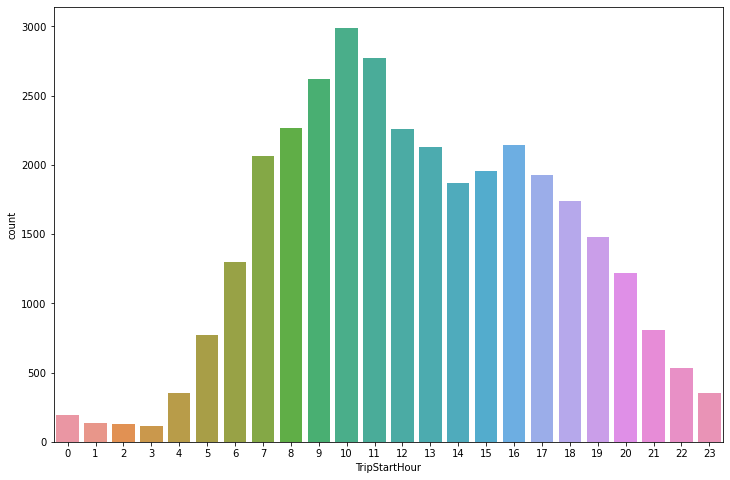

In [132]:
plt.figure(figsize=(12,8))
sns.countplot(x="TripStartHour", data=dfJourneysSanFrancisco)
# its clear that during early morning & late night, the car rent is extremely high
# 9 - 12 seems to be peak hours
# again 16 - 17 the car demand seems to be rising

**Derive variables**

In [135]:
# Required functions-

# Bifurcate dataset into weekday & weekend
def fn_is_weekend(row):
    if ((row['TripStartWeekDay'] == 5) | (row['TripStartWeekDay'] == 6)):
        return 1
    else:
        return 0

# Bifurcate dataset into yearly quarters
def fn_get_year_quarters(row):
    if ((row['TripStartMonth'] >= 0) & (row['TripStartMonth'] <= 2)):
        return 1
    elif ((row['TripStartMonth'] >= 3) & (row['TripStartMonth'] <= 5)):
        return 2
    elif ((row['TripStartMonth'] >= 6) & (row['TripStartMonth'] <= 8)):
        return 3
    else:
        return 4

# Bifurcate dataset w.r.t. daily hours
'''
1 : 21 - 5  : nightHours
2 : 6 - 7   : morningNonPeakHours
3 : 8 - 13  : morningPeakHours
4 : 14 - 17 : eveningPeakHours
5 : 18 - 20 : eveningNonPeakHours
'''
def fn_get_peak_hours(row):
    if ((row['TripStartHour'] >= 21) | (row['TripStartHour'] <= 5)):
        return 'nightHours'
    elif ((row['TripStartHour'] == 6) | (row['TripStartHour'] == 7)):
        return 'morningNonPeakHours'
    elif ((row['TripStartHour'] >= 8) & (row['TripStartHour'] <= 13)):
        return 'morningPeakHours'
    elif ((row['TripStartHour'] >= 14) & (row['TripStartHour'] <= 17)):
        return 'eveningPeakHours'
    else:
        return 'eveningNonPeakHours'

In [136]:
dfJourneysSanFrancisco['isWeekend'] = dfJourneysSanFrancisco.apply(lambda x: fn_is_weekend(x), axis=1)
dfJourneysSanFrancisco['yearQuarter'] = dfJourneysSanFrancisco.apply(lambda x: fn_get_year_quarters(x), axis=1)
dfJourneysSanFrancisco['peakHours'] = dfJourneysSanFrancisco.apply(lambda x: fn_get_peak_hours(x), axis=1)    

In [137]:
dfJourneysSanFrancisco

,tripId,carId,carParkingZipCode,carParkingCity,localTripStartTime,localTripEndTime,localTripCreationTime,priceInDollar,TripStartHour,TripStartDay,TripStartMonth,TripStartWeekDay,tripDurationInHour,preBookingDurationInHour,utilizationInHour,availabilityInHour,isWeekend,yearQuarter,peakHours
0,00010247034d28272cf5e1e16b43f52f,9ddac6a5fb0b3962db3b2f42fd31d3f9,94110,San Francisco,2017-11-14 22:15:00,2017-11-15 02:15:00,2017-11-14 20:32:59,20.00,22,14,11,1,4,1,3.75,4.0,0,4,nightHours
1,0001556e5d28e66b3318e89c094186c4,0f386ec90e0710ca143922520eaf8a3e,94117,San Francisco,2017-12-07 17:00:00,2017-12-08 04:00:00,2017-12-07 04:51:42,55.00,17,7,12,3,11,12,11.50,12.0,0,4,eveningPeakHours
2,000286e8771651e6983555c62558b57f,63e4509c686d891f5364c24339369460,94115,San Francisco,2017-03-23 10:00:00,2017-03-23 12:00:00,2017-03-23 08:49:48,18.00,10,23,3,3,2,1,2.50,3.0,0,2,morningPeakHours
3,0003651ffd2f07a7226fd6b7c979fecb,c9fbe5bf8e406cd13bd33ff5411fa3e3,94103,San Francisco,2017-07-05 19:00:00,2017-07-06 01:45:00,2017-07-05 01:07:31,33.75,19,5,7,2,6,17,7.00,7.0,0,3,eveningNonPeakHours
4,00046a5e37fee728d9b1c0840741f944,812d1f2214d3fe7f9624f03b1a78cb61,94123,San Francisco,2017-12-14 13:15:00,2017-12-14 14:45:00,2017-12-14 13:08:08,14.11,13,14,12,3,1,0,1.00,1.0,0,4,morningPeakHours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36149,fff0fc15ad79ab5e93714bafa5a6dc20,26b26593b7a0f7a80b0a7a0747882a6d,94110,San Francisco,2017-02-25 14:00:00,2017-02-25 16:00:00,2017-02-25 13:41:53,17.50,14,25,2,5,2,0,2.50,3.0,1,1,eveningPeakHours
36150,fff8ae03853b573d81782ba277413dee,5fa4b685ba407cae4ea84b6a0fa80a0e,94103,San Francisco,2017-05-18 13:15:00,2017-05-18 22:30:00,2017-05-17 21:51:14,46.25,13,18,5,3,9,15,9.00,9.0,0,2,morningPeakHours
36151,fffb60627f2c2e408fef7d739543deee,d0b26f3508b4bb46f1f1b42708545df0,94108,San Francisco,2017-10-23 08:30:00,2017-10-23 18:30:00,2017-10-19 15:46:46,55.19,8,23,10,0,10,88,10.00,10.0,0,4,morningPeakHours
36152,fffd3b9e130841ba884e4fa880e44594,c687b40673df4c0fe842261a6d58b194,94114,San Francisco,2017-02-19 18:30:00,2017-02-19 19:45:00,2017-02-19 18:10:59,10.62,18,19,2,6,1,0,1.00,1.0,1,1,eveningNonPeakHours


In [138]:
dfJourneysSanFrancisco = dfJourneysSanFrancisco[['priceInDollar','tripDurationInHour','preBookingDurationInHour'\
                                                 ,'utilizationInHour','availabilityInHour','isWeekend','yearQuarter'\
                                                 ,'peakHours']]
dfJourneysSanFrancisco

,priceInDollar,tripDurationInHour,preBookingDurationInHour,utilizationInHour,availabilityInHour,isWeekend,yearQuarter,peakHours
0,20.00,4,1,3.75,4.0,0,4,nightHours
1,55.00,11,12,11.50,12.0,0,4,eveningPeakHours
2,18.00,2,1,2.50,3.0,0,2,morningPeakHours
3,33.75,6,17,7.00,7.0,0,3,eveningNonPeakHours
4,14.11,1,0,1.00,1.0,0,4,morningPeakHours
...,...,...,...,...,...,...,...,...
36149,17.50,2,0,2.50,3.0,1,1,eveningPeakHours
36150,46.25,9,15,9.00,9.0,0,2,morningPeakHours
36151,55.19,10,88,10.00,10.0,0,4,morningPeakHours
36152,10.62,1,0,1.00,1.0,1,1,eveningNonPeakHours


In [139]:
dfDummies2 = pd.get_dummies(dfJourneysSanFrancisco['yearQuarter'])
dfDummies2.columns = ['yearQuarter' + str(col) for col in dfDummies2.columns]
dfJourneysSanFrancisco = pd.concat([dfJourneysSanFrancisco, dfDummies2], axis=1)
dfJourneysSanFrancisco.drop('yearQuarter', axis=1, inplace=True)

dfDummies3 = pd.get_dummies(dfJourneysSanFrancisco['peakHours'])
dfDummies3.columns = [str(col) for col in dfDummies3.columns]
dfJourneysSanFrancisco = pd.concat([dfJourneysSanFrancisco, dfDummies3], axis=1)
dfJourneysSanFrancisco.drop('peakHours', axis=1, inplace=True)

In [140]:
# Final data
dfJourneysSanFrancisco.columns

Index(['priceInDollar', 'tripDurationInHour', 'preBookingDurationInHour',
       'utilizationInHour', 'availabilityInHour', 'isWeekend', 'yearQuarter1',
       'yearQuarter2', 'yearQuarter3', 'yearQuarter4', 'eveningNonPeakHours',
       'eveningPeakHours', 'morningNonPeakHours', 'morningPeakHours',
       'nightHours'],
      dtype='object')

In [74]:
#dfJourneysSanFrancisco.iloc[:, dfJourneysSanFrancisco.columns != 'priceInDollar']
#dfJourneysSanFrancisco.iloc[:, 0]

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( dfJourneysSanFrancisco.iloc[:, dfJourneysSanFrancisco.columns != 'priceInDollar'], dfJourneysSanFrancisco.iloc[:, 0], test_size = 0.20, random_state = 1)
print(X_train.shape, X_test.shape)

(27281, 14) (6821, 14)


In [142]:
X_train.dtypes

tripDurationInHour            int64
preBookingDurationInHour      int64
utilizationInHour           float64
availabilityInHour          float64
isWeekend                     int64
yearQuarter1                  uint8
yearQuarter2                  uint8
yearQuarter3                  uint8
yearQuarter4                  uint8
eveningNonPeakHours           uint8
eveningPeakHours              uint8
morningNonPeakHours           uint8
morningPeakHours              uint8
nightHours                    uint8
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


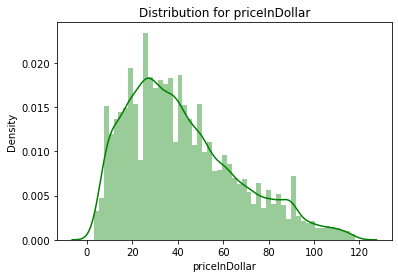

In [146]:
# Normality check for training data 
sns.distplot(y_train,bins='auto',color='green')
plt.title("Distribution for priceInDollar")
plt.ylabel("Density")
plt.show()

In [147]:
#If skewness of target variable is high, apply log transform to reduce the skewness-
#y_train = np.log1p(y_train)

#Normality re-check post applying log transform-
#sns.distplot(y_train,bins='auto',color='green')
#plt.title("Distribution for priceInDollar")
#plt.ylabel("Density")
#plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


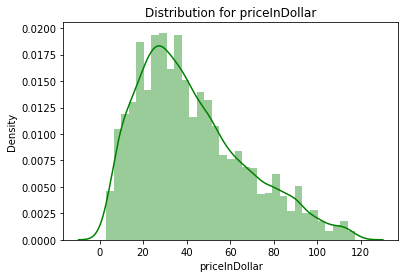

In [148]:
# Normality check for testing data 
sns.distplot(y_test,bins='auto',color='green')
plt.title("Distribution for priceInDollar")
plt.ylabel("Density")
plt.show()

**Apply Modelling**

In [150]:
# Import packages for modeling
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

**Linear Regression**

In [151]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

In [152]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))

#calculate R^2 for train data
r2_score(y_train, pred_train_LR)

Root Mean Squared Error For Training data = 13.254672976912078


0.7071783884366294

In [153]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

##calculating RMSE for train data
RMSE_test_LR= np.sqrt(mean_squared_error(y_test, pred_test_LR))

print("Root Mean Squared Error For test data = "+str(RMSE_test_LR))

#calculate R^2 for test data
r2_score(y_test, pred_test_LR)

Root Mean Squared Error For test data = 13.714139385972848


0.690807057761735

**Decision Tree**

In [154]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [155]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))

## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

Root Mean Squared Error For Training data = 13.788439815280144


0.6831196217628758

In [156]:
#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

Root Mean Squared Error For Test data = 13.951559777990736


0.6800088390033581

**Random Forest**

In [157]:
fit_RF = RandomForestRegressor().fit(X_train,y_train)

In [158]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)

##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))

## calculate R^2 for train data
r2_score(y_train, pred_train_RF)

Root Mean Squared Error For Training data = 6.934335952764474


0.9198552923632891

In [159]:
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

Root Mean Squared Error For Test data = 11.287258097304136


0.7905553046746484

**Gradient Boosting**

In [160]:
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [161]:
#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_GB))

#calculate R^2 for test data
r2_score(y_train, pred_train_GB)

Root Mean Squared Error For Training data = 10.357930739244951


0.8211820558643234

In [162]:
#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

#calculate R^2 for test data
r2_score(y_test, pred_test_GB)

Root Mean Squared Error For Test data = 10.546728092021244


0.8171361106364905

**Cross validation: Random Search CV on gradient boosting model**

In [163]:
#check the current parameters
gb = GradientBoostingRegressor(random_state = 0)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [165]:
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))
params = {'n_estimators': n_estimator, 'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = params, n_iter = 10, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

best_params = randomcv_gb.best_params_
best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

r2 = r2_score(y_test, predictions_gb)
rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance Report:')
print('Best Model = ',best_model)
print('Best Parameters = ',best_params)
print('R-squared = {:0.2}.'.format(r2))
print('RMSE = ', rmse)

Random Search CV Gradient Boosting Model Performance Report:
Best Model =  GradientBoostingRegressor(max_depth=97, n_estimators=19, random_state=0)
Best Parameters =  {'n_estimators': 19, 'max_depth': 97}
R-squared = 0.73.
RMSE =  12.791638124214918


**Model evaluation**

In [170]:
model = GradientBoostingRegressor(max_depth=97, n_estimators=19, random_state=0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))

print('GradientBoostingRegressor(max_depth=9, n_estimators=15, random_state=0) Performance Report:')
print('R-squared = {:0.2}.'.format(r2))
print('RMSE = ', rmse)


GradientBoostingRegressor(max_depth=9, n_estimators=15, random_state=0) Performance Report:
R-squared = 0.73.
RMSE =  12.791638124214918


**Cross validation: Random Search CV on Random forest**

In [171]:
gb = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))
params = {'n_estimators': n_estimator, 'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = params, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

best_params = randomcv_gb.best_params_
best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

r2 = r2_score(y_test, predictions_gb)
rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance Report:')
print('Best Model = ',best_model)
print('Best Parameters = ',best_params)
print('R-squared = {:0.2}.'.format(r2))
print('RMSE = ', rmse)

Random Search CV Gradient Boosting Model Performance Report:
Best Model =  RandomForestRegressor(max_depth=9, n_estimators=15, random_state=0)
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.82.
RMSE =  10.475367262921118


In [172]:
# Evaluate
model = RandomForestRegressor(max_depth=9, n_estimators=15, random_state=0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))

print('RandomForestRegressor(max_depth=9, n_estimators=15, random_state=0) Performance Report:')
print('R-squared = {:0.2}.'.format(r2))
print('RMSE = ', rmse)

RandomForestRegressor(max_depth=9, n_estimators=15, random_state=0) Performance Report:
R-squared = 0.82.
RMSE =  10.475367262921118


Best model: RandomForestRegressor(max_depth=9, n_estimators=15, random_state=0)

R-squared = 0.82

RMSE =  10.475367262921118
